In [3]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras


In [4]:
data = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [16]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [17]:
len(X_train)

60000

In [18]:
len(y_train)

60000

In [19]:
X_train[0].shape

(28, 28)

In [20]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [95]:
X_train = X_train/255
X_test = X_test/255

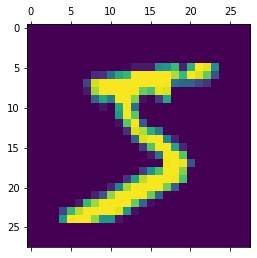

In [37]:
plt.matshow(X_train[0])

In [22]:
print(y_train[0])

5


In [23]:
X_train.shape

(60000, 28, 28)

In [38]:
#reshaping the 28*28 into as 60000*784
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [26]:
X_train_flatten.shape,X_test_flatten.shape

((60000, 784), (10000, 784))

In [27]:
y_test.shape

(10000,)

In [39]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
#building the simple model
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [40]:
model.fit(X_train_flatten,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2832 - accuracy: 0.7887
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8816 - accuracy: 0.8718
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6075 - accuracy: 0.8874
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4442 - accuracy: 0.8976
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3551 - accuracy: 0.9077
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3075 - accuracy: 0.9158
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.9202
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2706 - accuracy: 0.9236
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2635 - accuracy: 0.9247
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.258

In [41]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2670 - accuracy: 0.9253


[0.26698702573776245, 0.9253000020980835]

In [50]:
predicted = model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


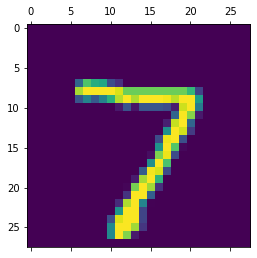

In [47]:
plt.matshow(X_test[0])

In [51]:
print("the predicted value is ",np.argmax(predicted[0]))

the predicted value is  7


In [55]:
y_predicted_labels = [np.argmax(i) for i in predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [59]:
#building confusion matrix

cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    2,    0,    4,    2,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [  10,    5,  927,   14,    9,    3,   12,   11,   38,    3],
       [   4,    0,   17,  919,    1,   26,    2,   11,   24,    6],
       [   2,    1,    3,    1,  921,    0,   10,    4,   11,   29],
       [  10,    2,    3,   36,   11,  771,   14,    8,   31,    6],
       [  16,    3,    7,    1,    7,   12,  908,    1,    3,    0],
       [   1,    6,   20,   11,    8,    0,    0,  948,    4,   30],
       [  13,    6,    6,   21,    9,   20,   10,   11,  872,    6],
       [  11,    7,    1,   10,   28,    4,    0,   30,    8,  910]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

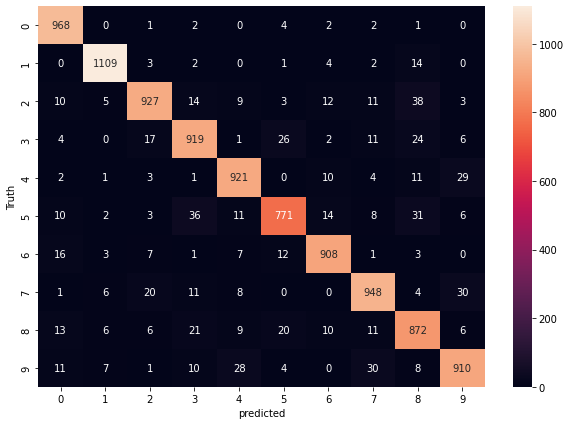

In [65]:
#building visual confusion matric using heatmap in seaborn
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [67]:
#now adding a hidden layers and checking the accuracy in the same model
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])


In [68]:
model.fit(X_train_flatten,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2741 - accuracy: 0.9223
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1254 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0881 - accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0666 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0529 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0421 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0350 - accuracy: 0.9887
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0288 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0246 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.019

In [69]:
model.evaluate(X_test_flatten,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0784 - accuracy: 0.9784


[0.0784015953540802, 0.9783999919891357]

In [84]:
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 1s 2ms/step


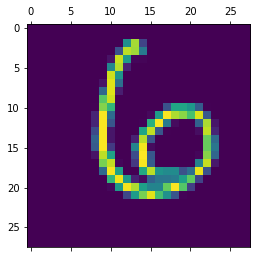

In [86]:
plt.matshow(X_test[100])

In [87]:
print("the predicted value is :",np.argmax(y_predicted[100]))

the predicted value is : 6


In [88]:
y_predicted = [np.argmax(i) for i in y_predicted]
print(y_predicted[:5])
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predicted)
cm

[7, 2, 1, 0, 4]


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    1,    0,    2,    1,    4,    2,    1,    3,    2],
       [   0, 1123,    3,    2,    2,    0,    1,    0,    4,    0],
       [   4,    4, 1007,    0,    0,    0,    0,    9,    8,    0],
       [   0,    0,    2,  989,    0,    8,    0,    4,    2,    5],
       [   0,    0,    5,    1,  962,    0,    1,    2,    1,   10],
       [   2,    0,    0,    6,    1,  874,    1,    0,    5,    3],
       [   5,    3,    3,    1,    4,   12,  930,    0,    0,    0],
       [   0,    4,    7,    1,    0,    0,    0, 1008,    1,    7],
       [   2,    1,    4,    5,    4,    3,    0,    3,  945,    7],
       [   1,    2,    0,    3,    9,    3,    2,    6,    1,  982]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

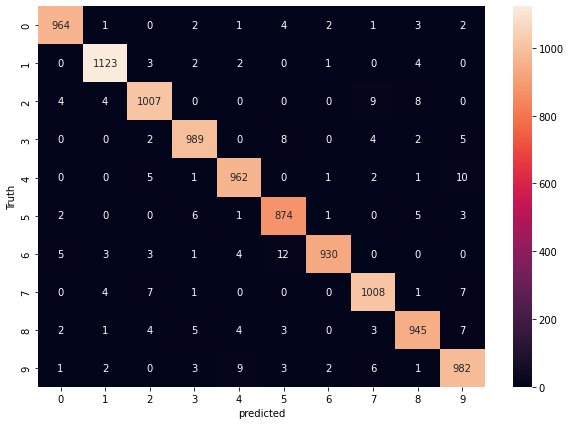

In [89]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot = True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [98]:
#building model without flattening the data extensively by using Flatten functioinality of keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [102]:
model.fit(X_train,y_train,epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1725 - accuracy: 0.9513
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1681 - accuracy: 0.9527
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1641 - accuracy: 0.9530
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1603 - accuracy: 0.9545
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1567 - accuracy: 0.9560
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1529 - accuracy: 0.9566
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1495 - accuracy: 0.9577
Epoch 8/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1462 - accuracy: 0.9584
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1427 - accuracy: 0.9596
Epoch 10/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.13